# **Problem Statement**

Prediction of stroke by the available dataset with 11 features provided and visualizing the data to showcase major factors impacting the stroke.

# **Column Details**
1) **id**: unique identifier <br>
2) **gender**: "Male", "Female" or "Other"<br>
3) **age**: age of the patient<br>
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) **ever_married**: "No" or "Yes"<br>
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) **Residence_type**: "Rural" or "Urban"<br>
9) **avg_glucose_level**: average glucose level in blood<br>
10) **bmi: body mass index**<br>
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) **stroke**: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient**<br>

# Hypothesis:
1.Age factor can significantly increases the chances of stroke <br>
<br>
2.Blood Pressure can significantly increases the chances of stroke<br>
<br>
3.Increased weight can significantly increases the chances of stroke<br>
<br>
4.Stress level can significantly increases the chances of stroke<br>
<br>
5.As the person becomes old(Age factor) there can be significantly increases the chances of stroke<br>
<br>
6.Intake of high dosage medicines can significantly increases the chances of stroke<br>
<br>
7.Family history of stroke can significantly have the chances of stroke<br>
<br>
8.Diabetics person can significantly have the chances of stroke<br>
<br>
9.Bad Blood Vessels working operation can significantly increase the chances of stroke.<br>
<br>
10.Smoking is also bad for lungs and heart, hence can cause stroke<br>
<br>
11.Can living style/hygiene/habits/pollution be a reason of stroke?<br>
<br>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
#Importing the dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [3]:
#Reading the CSV file with pandas 
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [4]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
#Checking Categorical Variables data distribution
print(df['gender'].value_counts(normalize=True)*100)
print(df['ever_married'].value_counts(normalize=True)*100)
print(df['work_type'].value_counts(normalize=True)*100)
print(df['smoking_status'].value_counts(normalize=True)*100)

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64


In [7]:
#Checking Target Class variable is balanced or not
print(df['stroke'].value_counts(normalize=True)*100)

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [8]:
df['stroke'].unique()

array([1, 0])

In [9]:
#Checking for NA values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
#Filling the NA values with mean values of BMI
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
#Description of the complete dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
#removing the extra column which is not required for analysis
df.drop(['id'], axis=1, inplace=True)
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


In [14]:
#Creating list for categorical and numerical variables
cat=[]
cont=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        cont.append(i)
print('Categorical Variables:',cat) 
print('Numeric Variables:',cont)

Categorical Variables: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numeric Variables: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


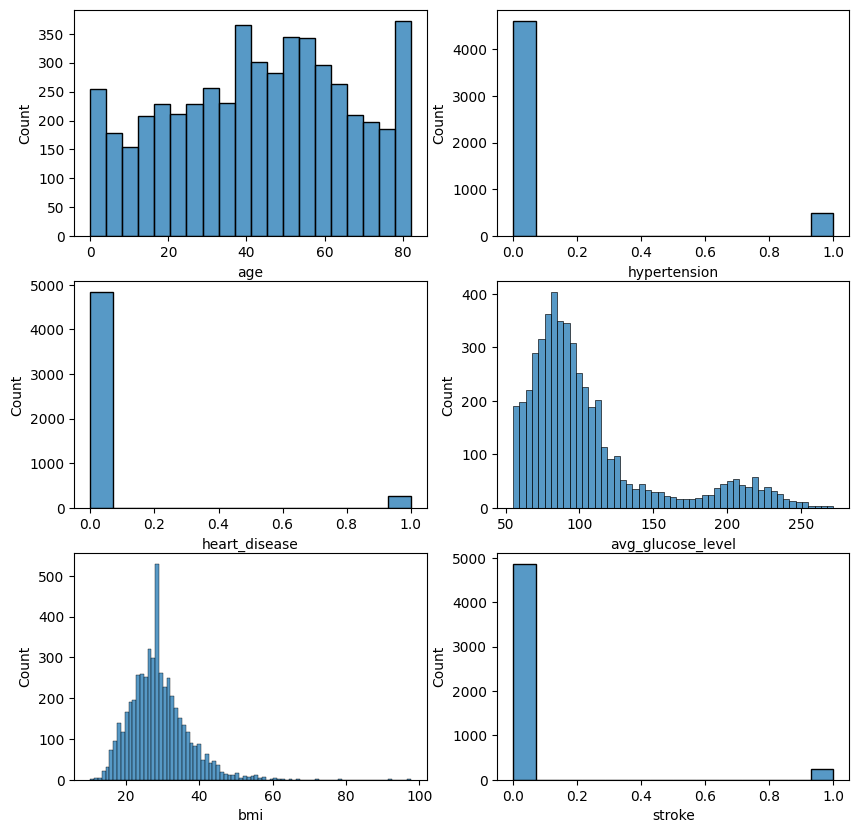

In [15]:
#Plotting the histogram for multiple features
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,10)
a = sns.histplot(df['age'] , ax=axes[0][0])
a = sns.histplot(df['hypertension'] , ax=axes[0][1])
a = sns.histplot(df['heart_disease'] , ax=axes[1][0])
a = sns.histplot(df['avg_glucose_level'] , ax=axes[1][1])
a = sns.histplot(df['bmi'] , ax=axes[2][0])
a = sns.histplot(df['stroke'] , ax=axes[2][1])

<Axes: >

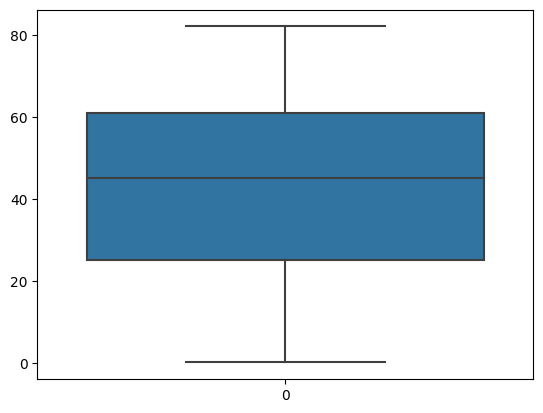

In [16]:
#Box plot presentation for Age 
sns.boxplot(df['age'])

<Axes: >

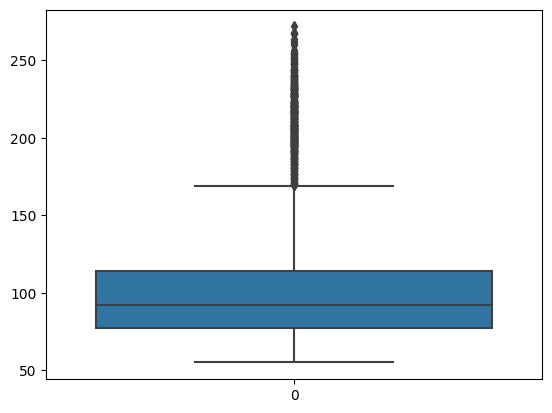

In [17]:
#Box plot presentation for Average Glucose Level 
sns.boxplot(df['avg_glucose_level'])


<Axes: >

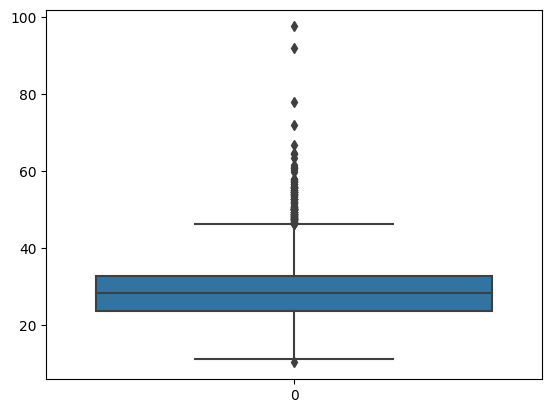

In [18]:
#Box plot presentation for BMI 
sns.boxplot(df['bmi'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


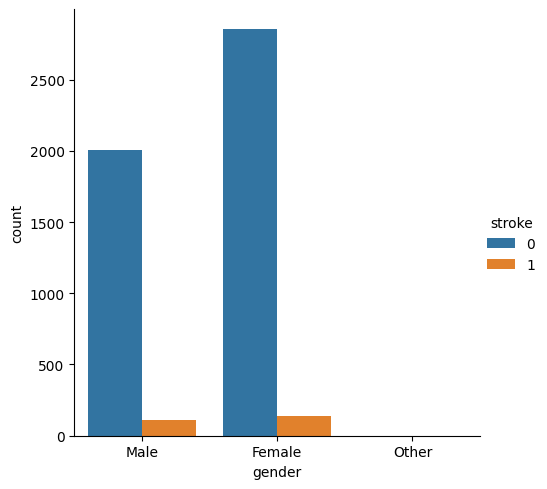

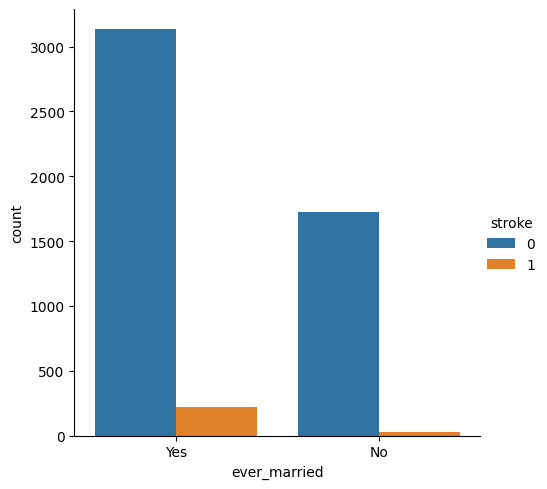

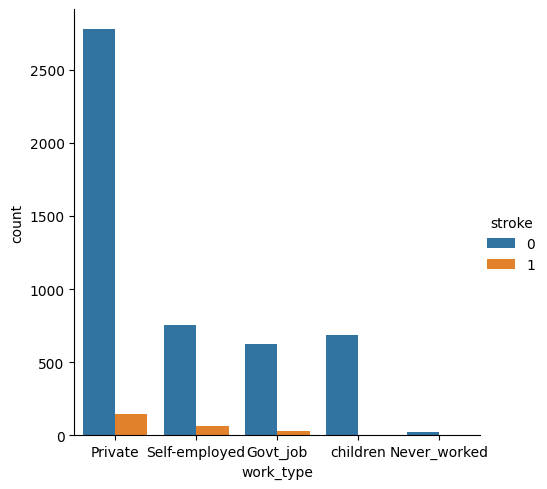

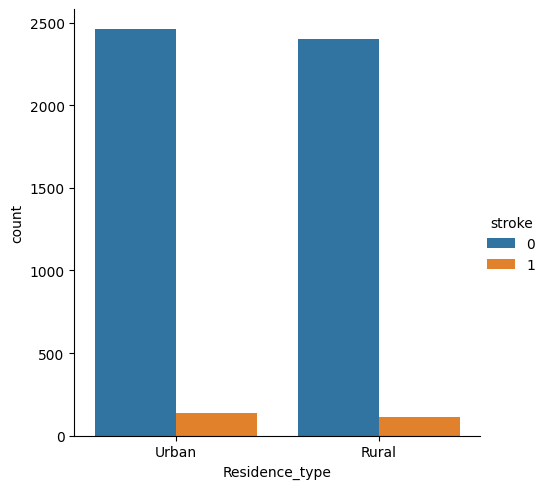

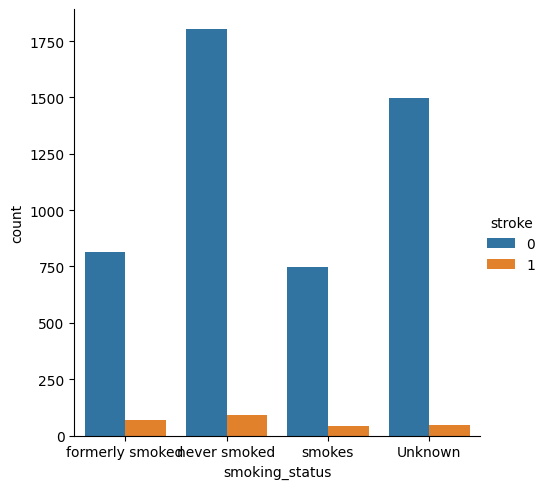

In [19]:
#Categorical plot presentation  
sns.catplot(x="gender", hue="stroke", data=df, kind="count")
sns.catplot(x="ever_married", hue="stroke", data=df, kind="count")
sns.catplot(x="work_type", hue="stroke", data=df, kind="count")
sns.catplot(x="Residence_type", hue="stroke", data=df, kind="count")
sns.catplot(x="smoking_status", hue="stroke", data=df, kind="count")

In [20]:
#Encoding of categorical variables
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1


<Axes: >

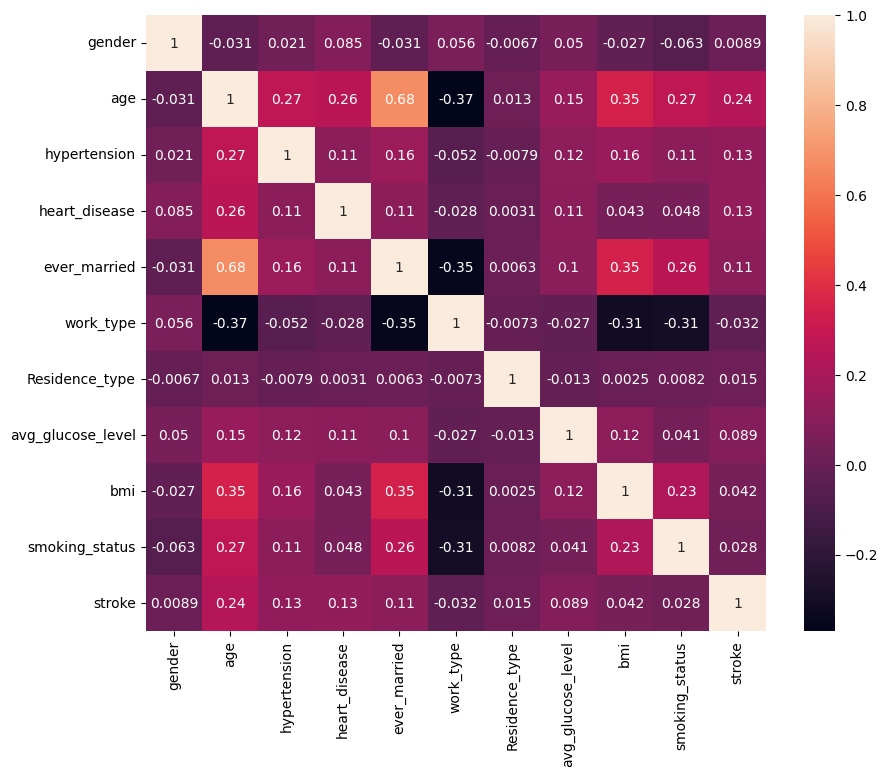

In [21]:
#Plotting the heat map for correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [22]:
#Age and Ever married columns has the highest correlation of 0.68
#bmi and Ever married columns has the highest correlation of 0.35

#BMI and avg_glucose_level attributes have the outliers from the boxplots

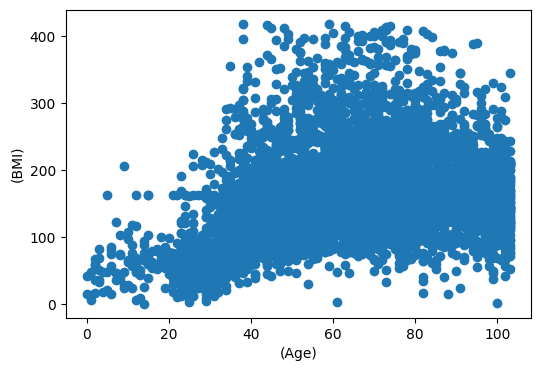

In [23]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df['age'],df['bmi'])
 
# x-axis label
ax.set_xlabel('(Age)')
 
# y-axis label
ax.set_ylabel('(BMI)')
plt.show()

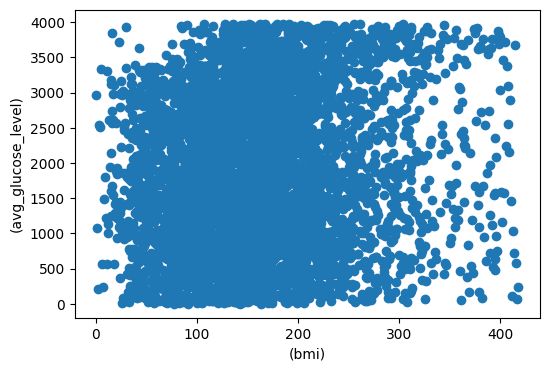

In [24]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df['bmi'],df['avg_glucose_level'])
 
# x-axis label
ax.set_xlabel('(bmi)')
 
# y-axis label
ax.set_ylabel('(avg_glucose_level)')
plt.show()

In [25]:
#Creating seperate dataframes for the stroke variables
df_1=df[df['stroke']==1]
df_0=df[df['stroke']==0]

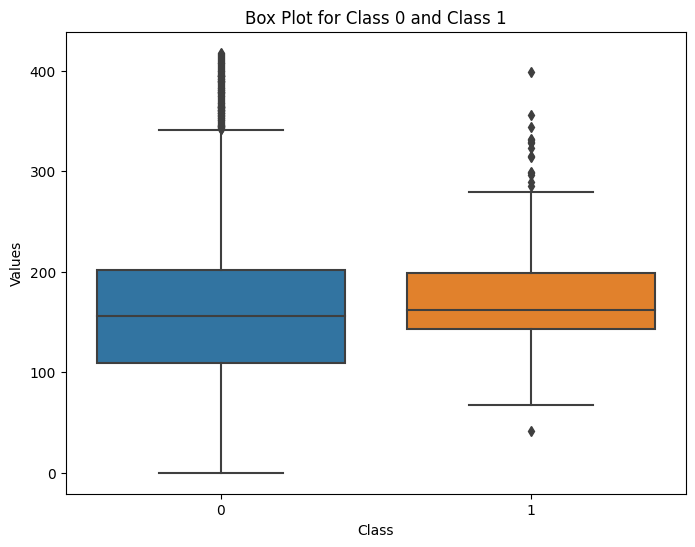

In [26]:
# Combine the dataframes into one for easy plotting
combined_data = pd.concat([df_0, df_1])

# Plotting box plots for each class
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='bmi', data=combined_data)
plt.xlabel('Class')
plt.ylabel('Values')
plt.title('Box Plot for Class 0 and Class 1')
plt.show()

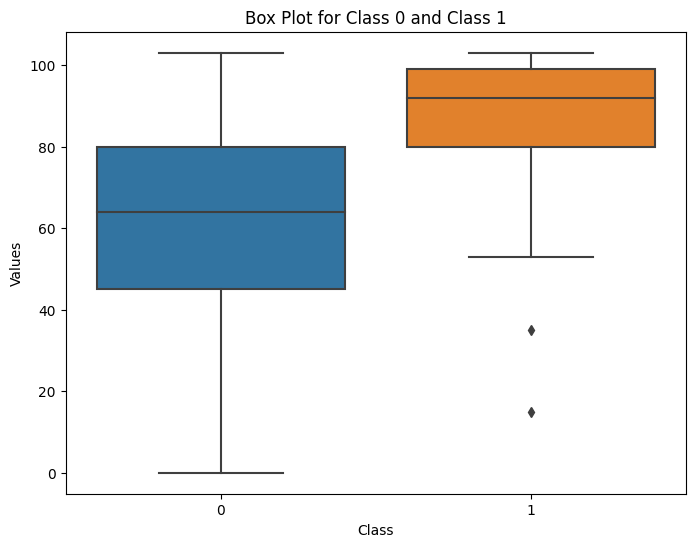

In [27]:

# Combine the dataframes into one for easy plotting
combined_data = pd.concat([df_0, df_1])

# Plotting box plots for each class
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=combined_data)
plt.xlabel('Class')
plt.ylabel('Values')
plt.title('Box Plot for Class 0 and Class 1')
plt.show()

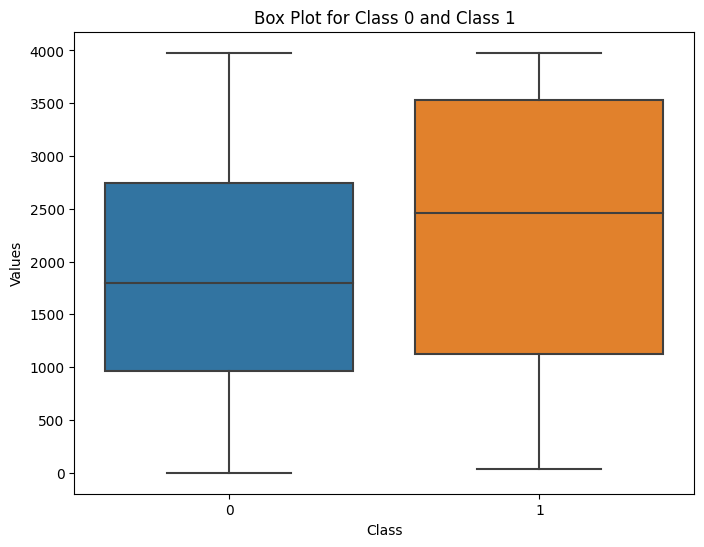

In [28]:
# Combine the dataframes into one for easy plotting
combined_data = pd.concat([df_0, df_1])

# Plotting box plots for each class
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=combined_data)
plt.xlabel('Class')
plt.ylabel('Values')
plt.title('Box Plot for Class 0 and Class 1')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


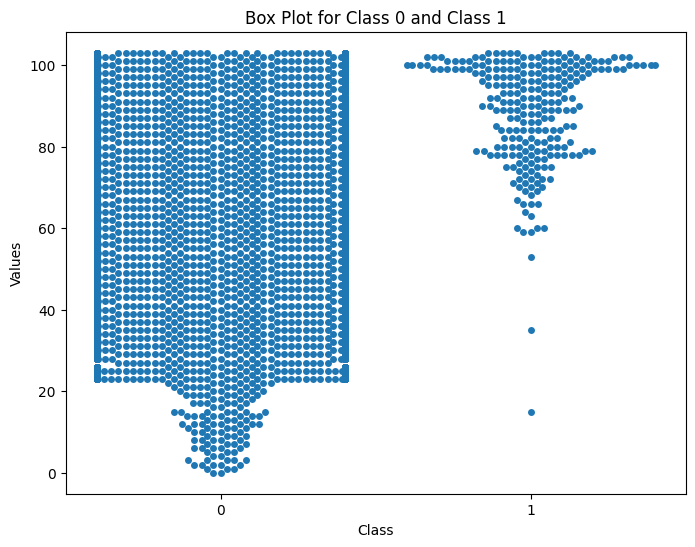

In [29]:
# Combine the dataframes into one for easy plotting
combined_data = pd.concat([df_0, df_1])

# Plotting box plots for each class
plt.figure(figsize=(8, 6))
sns.swarmplot(x='stroke', y='age', data=combined_data)
plt.xlabel('Class')
plt.ylabel('Values')
plt.title('Box Plot for Class 0 and Class 1')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


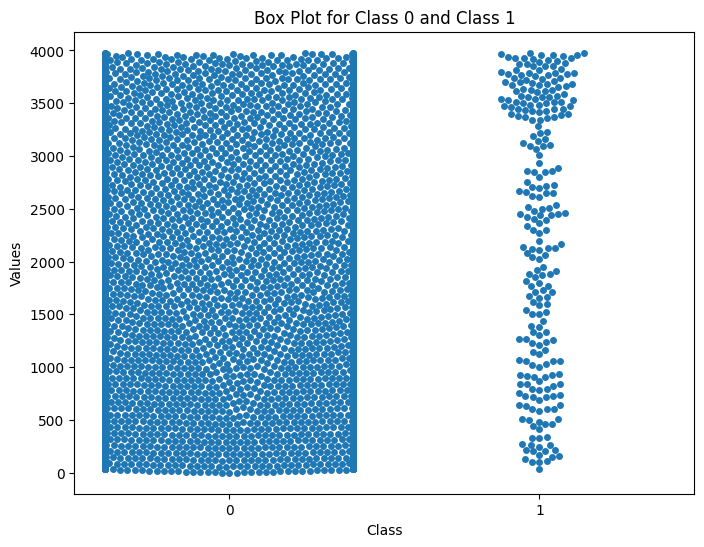

In [30]:
# Combine the dataframes into one for easy plotting
combined_data = pd.concat([df_0, df_1])

# Plotting box plots for each class
plt.figure(figsize=(8, 6))
sns.swarmplot(x='stroke', y='avg_glucose_level', data=combined_data)
plt.xlabel('Class')
plt.ylabel('Values')
plt.title('Box Plot for Class 0 and Class 1')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


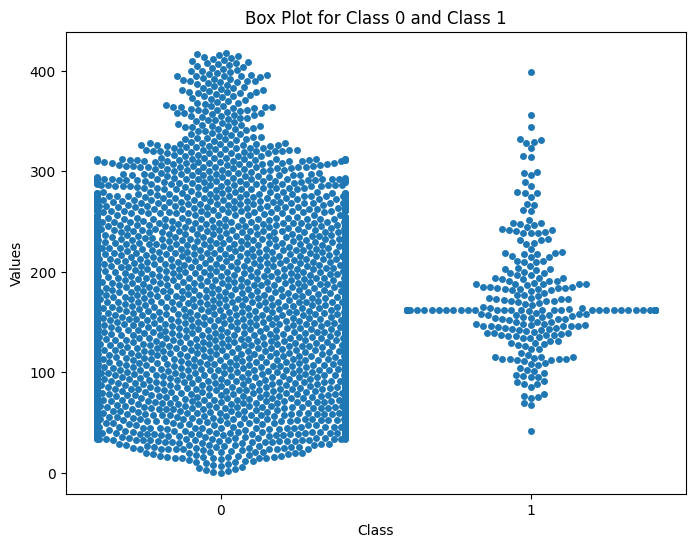

In [31]:
# Combine the dataframes into one for easy plotting
combined_data = pd.concat([df_0, df_1])

# Plotting box plots for each class
plt.figure(figsize=(8, 6))
sns.swarmplot(x='stroke', y='bmi', data=combined_data)
plt.xlabel('Class')
plt.ylabel('Values')
plt.title('Box Plot for Class 0 and Class 1')
plt.show()

The BMI is a convenient rule of thumb used to broadly categorize a person as based on tissue mass (muscle, fat, and bone) and height. Major adult BMI classifications are underweight (under 18.5 kg/m2), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obese (30 or more).[1] 
https://en.wikipedia.org/wiki/Body_mass_index

Severely underweight - BMI less than 16.5kg/m^2
Underweight - BMI under 18.5 kg/m^2
Normal weight - BMI greater than or equal to 18.5 to 24.9 kg/m^2
Overweight – BMI greater than or equal to 25 to 29.9 kg/m^2
Obesity – BMI greater than or equal to 30 kg/m^2
Obesity class I – BMI 30 to 34.9 kg/m^2
Obesity class II – BMI 35 to 39.9 kg/m^2
Obesity class III – BMI greater than or equal to 40 kg/m^2 (also referred to as severe, extreme, or massive obesity)
Asian and South Asian population
overweight - BMI between 23 and 24.9 kg/m^2
obesity - BMI greater than 25 kg/m^2
https://www.ncbi.nlm.nih.gov/books/NBK541070/


The lowest BMI recorded was 7.5 (she was only 21 inches tall and died of hypothermia), highest BMIs are around 188 [Guinness World Book of Records].


In [32]:
#BMI Max and Min values
bmi_max_values = df['bmi'].max()
bmi_min_values = df['bmi'].min()
print(f"Maximum value in column 'A': {bmi_max_values}")
print(f"Minimum value in column 'A': {bmi_min_values}")

Maximum value in column 'A': 418
Minimum value in column 'A': 0


In [33]:
len(df['bmi'][df['bmi']<7.5])

8

In [34]:
len(df['bmi'][df['bmi']>188])

1569

In [35]:
print(len(df['bmi'][df['bmi']<1].unique()))
print(df.shape)

1
(5110, 11)


In [36]:
#BMI Max and Min values
bmi_max_values = df['age'].max()
bmi_min_values = df['bmi'].min()
print(f"Maximum value in column 'A': {bmi_max_values}")
print(f"Minimum value in column 'A': {bmi_min_values}")

Maximum value in column 'A': 103
Minimum value in column 'A': 0


In [37]:
df_new=df[(df['bmi'] > 7.5) & (df['bmi'] < 188)]

In [38]:
df_new.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0,82,0,0,1,3,0,3588,162,2,1


In [39]:
df_1=df_new[df_new['stroke']==1]
df_0=df_new[df_new['stroke']==0]

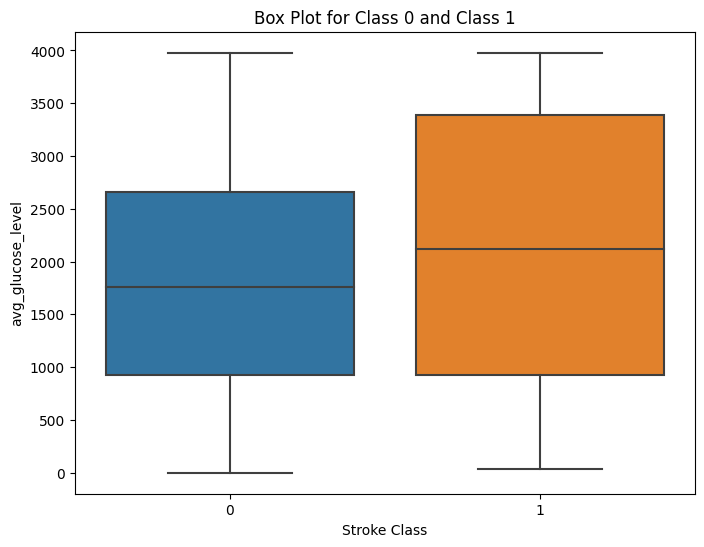

In [40]:
# Combine the dataframes into one for easy plotting
combined_data = pd.concat([df_0, df_1])

# Plotting box plots for each class
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=combined_data)
plt.xlabel('Stroke Class')
plt.ylabel('avg_glucose_level')
plt.title('Box Plot for Class 0 and Class 1')
plt.show()

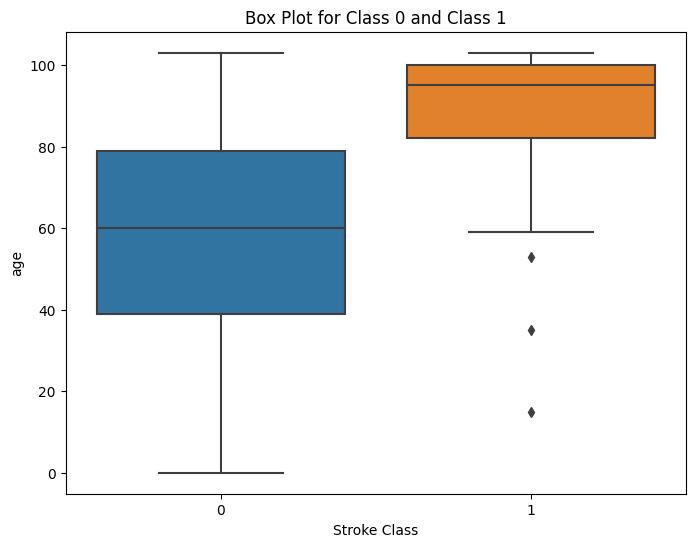

In [41]:
# Combine the dataframes into one for easy plotting
combined_data = pd.concat([df_0, df_1])

# Plotting box plots for each class
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=combined_data)
plt.xlabel('Stroke Class')
plt.ylabel('age')
plt.title('Box Plot for Class 0 and Class 1')
plt.show()

In [42]:
#Age Max and Min values
age_max_values = df['age'].max()
age_min_values = df['age'].min()
print(f"Maximum value in column 'A': {age_max_values}")
print(f"Minimum value in column 'A': {age_min_values}")

Maximum value in column 'A': 103
Minimum value in column 'A': 0


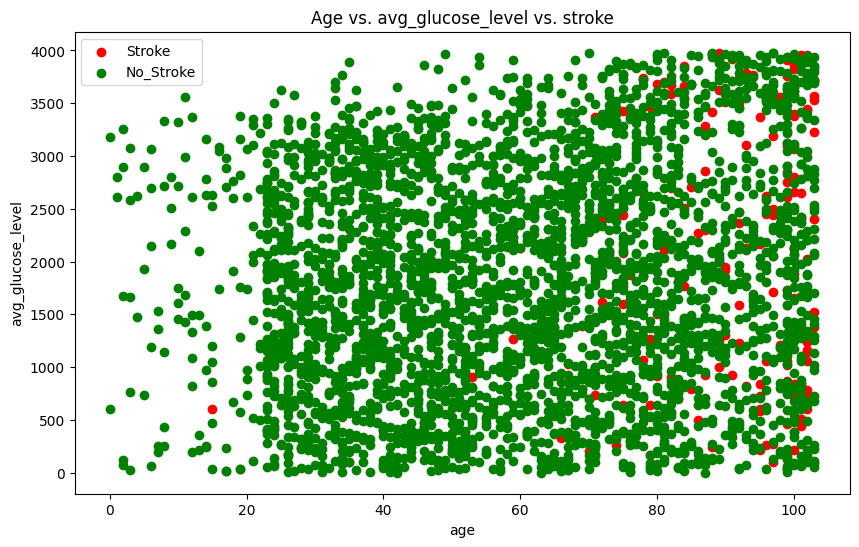

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

stroke_data = df_new[df_new['stroke'] == 1]
plt.scatter(stroke_data['age'], stroke_data['avg_glucose_level'], color='red', label='Stroke')

no_stroke_data = df_new[df_new['stroke'] == 0]
plt.scatter(no_stroke_data['age'], no_stroke_data['avg_glucose_level'], color='green', label='No_Stroke')

plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.title('Age vs. avg_glucose_level vs. stroke')

plt.show()

In [44]:
df_new[['age','avg_glucose_level','stroke']]

,age,avg_glucose_level,stroke
1,82,3588,1
4,100,3394,1
5,102,3448,1
6,95,588,1
7,90,1951,1
...,...,...,...
5104,34,2374,0
5105,101,1360,0
5107,56,1314,0
5108,72,3363,0


<Axes: >

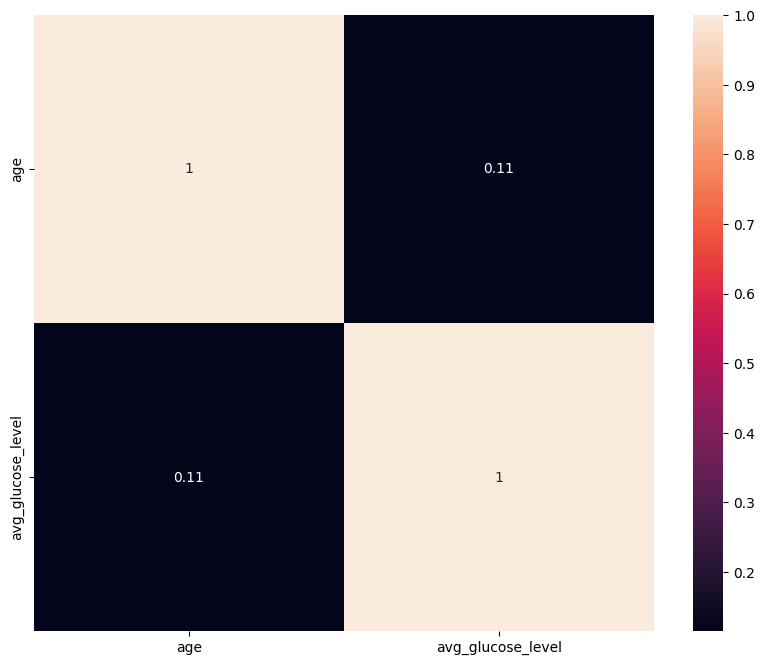

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new[['age','avg_glucose_level']].corr(),annot=True)

In [46]:
df_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0,82,0,0,1,3,0,3588,162,2,1
4,0,100,1,0,1,3,0,3394,113,2,1
5,1,102,0,0,1,2,1,3448,164,1,1
6,1,95,1,1,1,2,0,588,147,2,1
7,0,90,0,0,0,2,1,1951,101,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,34,0,0,0,4,0,2374,59,0,0
5105,0,101,1,0,1,2,1,1360,162,2,0
5107,0,56,0,0,1,3,0,1314,180,2,0
5108,1,72,0,0,1,2,0,3363,129,1,0


In [47]:
#df_minor=df_new[df_new['stroke'] == 1]
#df_major=df_new[df_new['stroke'] == 0]

In [48]:
#from sklearn.utils import resample
#df_minor = resample(df_minor, replace=True, n_samples=700, random_state=42) 
#df_major = resample(df_0, replace=True, n_samples=2500, random_state=42) 

In [49]:
#df_balanced = pd.concat([df_major, df_minor])
#df_balanced.shape

In [50]:
#df_balanced.stroke.value_counts()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve,auc

In [52]:
X = df_new
#X = df_new.drop("stroke", axis=1)
Y = df_new["stroke"]

In [53]:
print(X.shape)
print(Y.shape)

(3503, 11)
(3503,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.2, stratify=Y,random_state=1)

In [55]:
df_minor=X_train[X_train['stroke'] == 1]
df_major=X_train[X_train['stroke'] == 0]


In [56]:
df_minor.reset_index(drop=True,inplace=True)
df_major.reset_index(drop=True,inplace=True)

In [57]:
print(df_minor.shape)
print(df_major.shape)

(136, 11)
(2666, 11)


In [58]:
#2666/(136+2666)

In [59]:
from sklearn.utils import resample
df_minor = resample(df_minor, replace=True, n_samples=2666, random_state=42) 

In [60]:
df_balanced = pd.concat([df_major, df_minor])
df_balanced.shape

(5332, 11)

In [61]:
y_train=df_balanced['stroke']
X_train=df_balanced.drop('stroke',axis=1)

In [62]:
X_test=X_test.drop('stroke',axis=1)

In [63]:
#smote = SMOTE(sampling_strategy='auto', random_state=1)
#X_train_new, y_train_new = smote.fit_resample(X_train, y_train)

In [64]:
print(X_train.shape)
#print(X_train_new.shape)
print(X_test.shape)
print(y_train.shape)
#print(y_train_new.shape)
print(y_test.shape)

(5332, 10)
(701, 10)
(5332,)
(701,)


**XG BOOST**

In [65]:
import xgboost as xgb
xgbc=xgb.XGBClassifier(random_state=1)
#scale_pos_weight=20

In [66]:
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print(class_report)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.9343794579172611
[[647  20]
 [ 26   8]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       667
           1       0.29      0.24      0.26        34

    accuracy                           0.93       701
   macro avg       0.62      0.60      0.61       701
weighted avg       0.93      0.93      0.93       701

0.6026545550754036


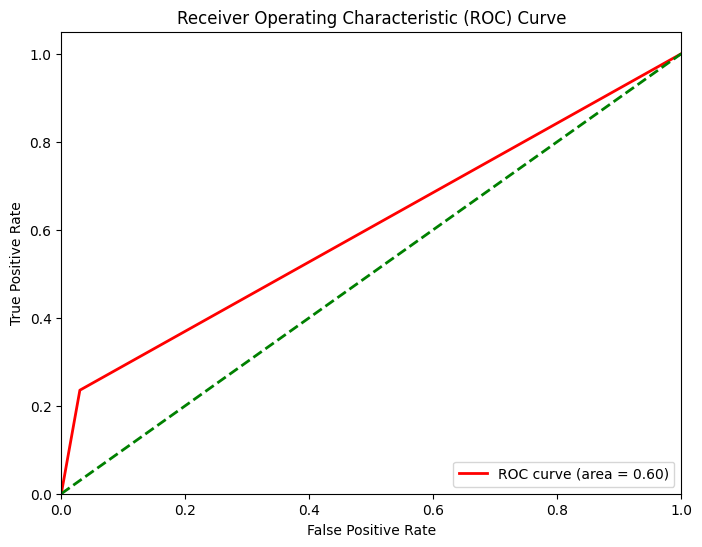

In [67]:
# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)

In [69]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print(class_report)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.9443651925820257
[[659   8]
 [ 31   3]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       667
           1       0.27      0.09      0.13        34

    accuracy                           0.94       701
   macro avg       0.61      0.54      0.55       701
weighted avg       0.92      0.94      0.93       701

0.5381206455595731


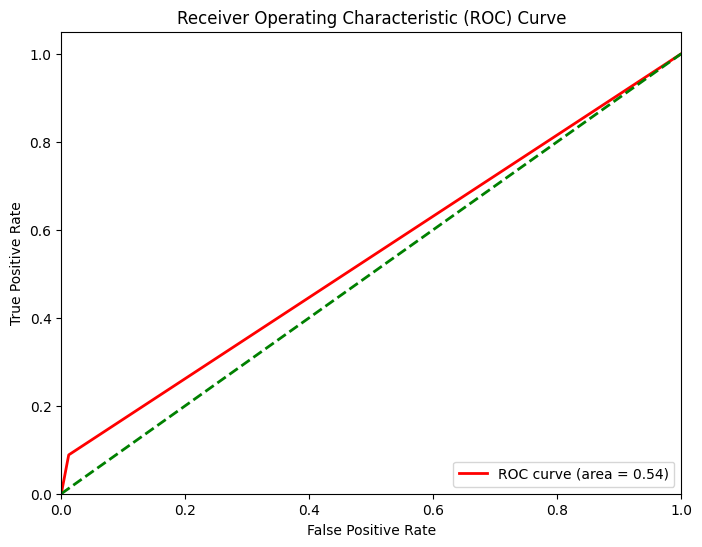

In [70]:
# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

LOGISTIC REGRESSION

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1)

In [72]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print(class_report)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.7332382310984308
[[486 181]
 [  6  28]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       667
           1       0.13      0.82      0.23        34

    accuracy                           0.73       701
   macro avg       0.56      0.78      0.53       701
weighted avg       0.95      0.73      0.81       701

0.7760825469618133


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


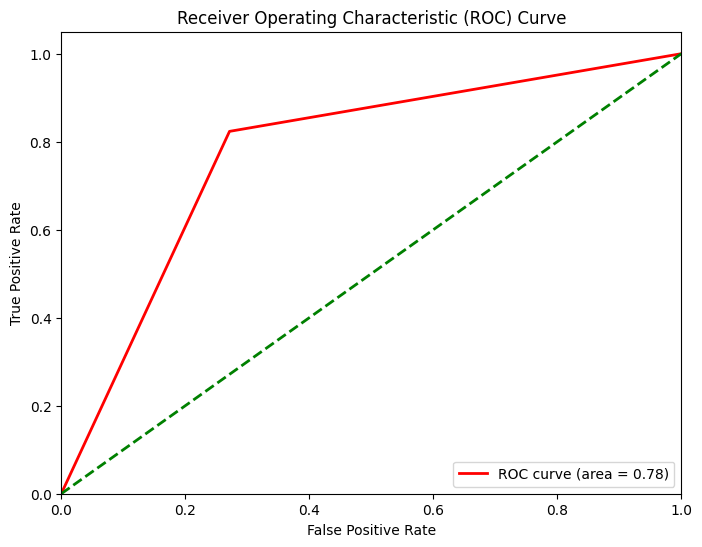

In [73]:
# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Conclusion**: 
